Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Cantaloupe 1', 'Banana', 'Tomato 1', 'Lemon', 'Apple Braeburn', 'Apricot']
Found 3196 files belonging to 6 classes.
Using 2397 files for training.
Found 3196 files belonging to 6 classes.
Using 799 files for validation.
['Apple Braeburn', 'Apricot', 'Banana', 'Cantaloupe 1', 'Lemon', 'Tomato 1']


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_9 (Lambda)           (None, 100, 100, 4)       0         
                                                                 
 conv1 (Conv2D)              (None, 100, 100, 16)      1616      
                                                                 
 conv1_relu (Activation)     (None, 100, 100, 16)      0         
                                                                 
 pool1 (MaxPooling2D)        (None, 50, 50, 16)        0         
                                                                 
 conv2 (Conv2D)              (None, 50, 50, 32)        12832     
                                                                 
 conv2_relu (Activation)     (None, 50, 50, 32)        0         
                                                                 
 pool2 (MaxPooling2D)        (None, 25, 25, 32)      

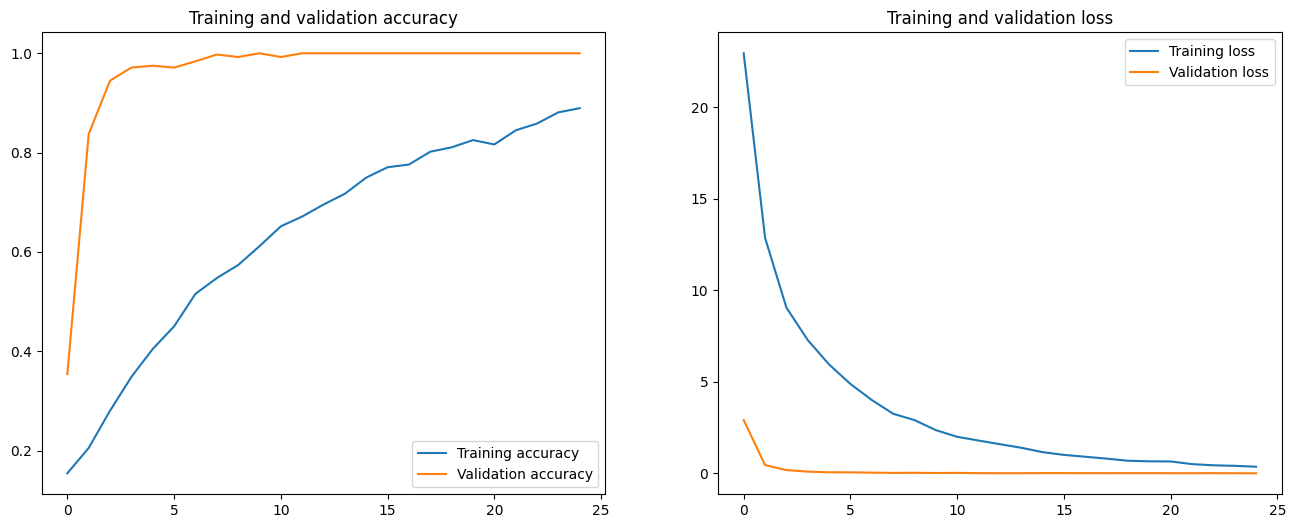

Found 1068 files belonging to 6 classes.
34/34 [==============================] - 8s 236ms/step - loss: 0.2526 - accuracy: 0.9513
Test loss, test acc: [0.25259122252464294, 0.9513108730316162]


In [ ]:
#                                                                              FAIQA ADNAN (20L-1116)
#                                                                              MARIYAM ALI (20L-2156)
#                                                                          AISHA MUHAMMAD NAWAZ (20L-0921)
#                                                                 BSCS 6E AI PROJECT : FRUIT CLASSIFICATION USING CNN

#CONFIGURATION 1 :-

#IMPORTING REQUIRED LIBRARIES:
import matplotlib.pyplot as plt                                        #For plotting graphs
import os                                                              #For operating system related functions
import zipfile
from google.colab import drive

#For Main Machine Learning framework:
import tensorflow as tf
from tensorflow import keras                                           #For builiding & training neural networks
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout, Lambda
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint


# IMPORTING DATASET:
drive.mount('/content/drive')                                             #To get folder from my google drive

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/fruits.zip', 'r')       #Opens the zip file in read mode
zip_ref.extractall('/content')                                            #Extracts the files into the /content folder
zip_ref.close()
fruits=[]

FruitsTypes=os.listdir('/content/fruits/fruits-360/Training')             #Getting subfolders i.e types of fruits names
print(FruitsTypes)


base_dir = '/content/fruits/fruits-360'                                   # relative path to the Fruit-Images-Dataset folder
test_dir = os.path.join(base_dir, 'Test')
train_dir = os.path.join(base_dir, 'Training')

#---------------------------------------------------------------------------------------------------------------------------


image_size    = (100, 100)          # width and height of the used images
input_shape   = (100, 100, 3)       # images in the Fruit-360 are 100 x 100 RGB images
batch_size    = 50
num_classes   = 6
validation_split = 0.25
learning_rate    = 0.1
verbose       = 1



#---------------------------------------------------------------------------------------------------------------------------


#splitting data in train_ds and val_ds
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.25,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    subset='training',
    seed=123,
) 

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.25,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False,
    subset='validation',
    seed=123,
)
class_names = train_ds.class_names
print(class_names)


AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(buffer_size=batch_size).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(buffer_size=batch_size).prefetch(buffer_size=AUTOTUNE)


#-------------------------------------------------------------------------------------------------

#Function to augment one image at a time, called inside data_augmentation
def augment_image(x):
    import tensorflow as tf
    x = tf.image.random_saturation(x, 0.9, 1.2)
    x = tf.image.random_hue(x, 0.02)
    return x



data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
  layers.RandomZoom(0.0),
  layers.RandomHeight(0.0),
  layers.RandomWidth(0.0),
  layers.Lambda(augment_image)

])


#---------------------------------------------------------------------------------------------------------------------------

def convert_to_hsv_and_grayscale(x):
    import tensorflow as tf
    hsv = tf.image.rgb_to_hsv(x)
    gray = tf.image.rgb_to_grayscale(x)
    rez = tf.concat([hsv, gray], axis=-1)
    return rez


model = Sequential([
    Input(shape = input_shape, name = 'data'),
    Lambda(convert_to_hsv_and_grayscale),
    Conv2D(16, (5, 5), strides=(1, 1), padding ='same', name = 'conv1'),
    Activation('relu', name = 'conv1_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool1'),
    Conv2D(32, (5, 5), strides = (1, 1), padding = 'same', name = 'conv2'),
    Activation('relu', name = 'conv2_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool2'),
    Conv2D(64, (5, 5), strides = (1, 1), padding = 'same', name = 'conv3'),
    Activation('relu', name = 'conv3_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool3'),
    Conv2D(128, (5, 5), strides = (1, 1), padding = 'same', name = 'conv4'),
    Activation('relu', name = 'conv4_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool4'),
    Flatten(),
    Dense(1024, activation='relu', name='fcl1'),
    Dropout(0.2),
    Dense(256, activation='relu', name='fcl2'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax', name='predictions')
])


optimizer = Adadelta(lr=learning_rate)
model.compile(optimizer = optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()


epochs = 25
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training accuracy')
plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.show()



#-------------------------------------------------------------------------------------------------
#                                     TESTING
#-------------------------------------------------------------------------------------------------


test_ds = tf.keras.utils.image_dataset_from_directory( 
    test_dir, 
    seed = 123, 
    image_size = image_size,
    shuffle=False                                 #No shuffling for classification report
)

test_images, test_labels = tuple(zip(*test_ds))

predictions = model.predict(test_ds)
score = tf.nn.softmax(predictions)

results = model.evaluate(test_ds)
print("Test loss, test acc:", results)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive
['Tomato 1', 'Lemon', 'Cantaloupe 1', 'Apricot', 'Banana', 'Apple Braeburn']
Found 3196 files belonging to 6 classes.
Using 2397 files for training.
Found 3196 files belonging to 6 classes.
Using 799 files for validation.
['Apple Braeburn', 'Apricot', 'Banana', 'Cantaloupe 1', 'Lemon', 'Tomato 1']


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 100, 100, 4)       0         
                                                                 
 conv1 (Conv2D)              (None, 100, 100, 16)      1616      
                                                                 
 conv1_relu (Activation)     (None, 100, 100, 16)      0         
                                                                 
 pool1 (MaxPooling2D)        (None, 50, 50, 16)        0         
                                                                 
 conv2 (Conv2D)              (None, 50, 50, 32)        12832     
                                                                 
 conv2_relu (Activation)     (None, 50, 50, 32)        0         
                                                                 
 pool2 (MaxPooling2D)        (None, 25, 25, 32)       

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


48/48 [==============================] - 82s 2s/step - loss: 13.9647 - accuracy: 0.1602 - val_loss: 0.7083 - val_accuracy: 0.7910
Epoch 2/25
48/48 [==============================] - 73s 2s/step - loss: 7.6502 - accuracy: 0.2820 - val_loss: 0.0564 - val_accuracy: 0.9825
Epoch 3/25
48/48 [==============================] - 76s 2s/step - loss: 5.9314 - accuracy: 0.3492 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 4/25
48/48 [==============================] - 76s 2s/step - loss: 4.6457 - accuracy: 0.4197 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 5/25
48/48 [==============================] - 80s 2s/step - loss: 3.8715 - accuracy: 0.4660 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 6/25
48/48 [==============================] - 74s 2s/step - loss: 3.0329 - accuracy: 0.5144 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 7/25
48/48 [==============================] - 77s 2s/step - loss: 2.6930 - accuracy: 0.5507 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 8/25
48/48 [============

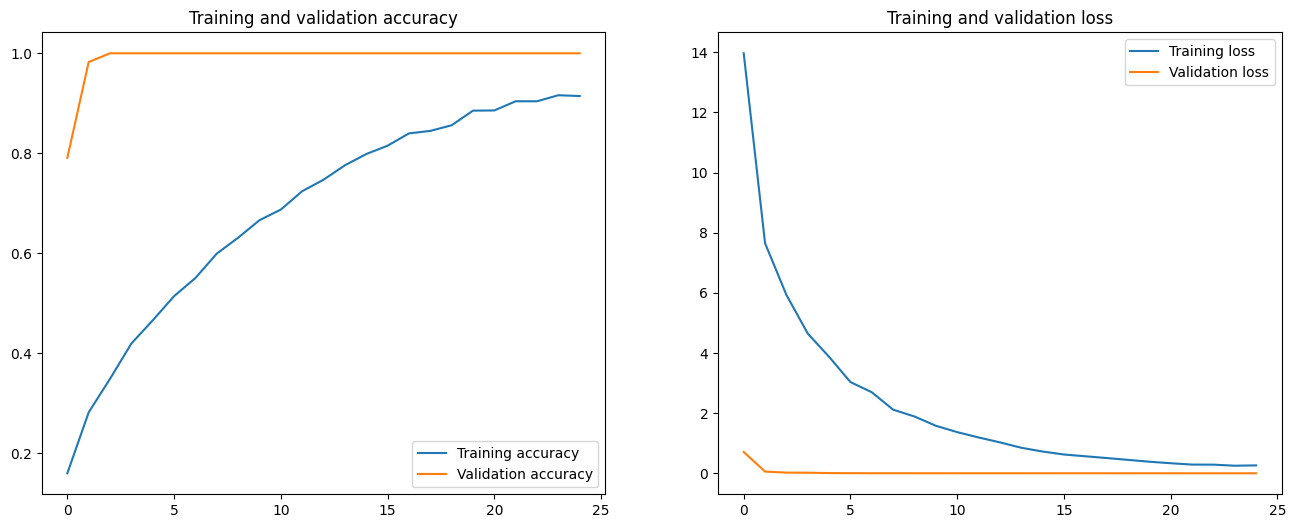

Found 1068 files belonging to 6 classes.
34/34 [==============================] - 7s 215ms/step - loss: 0.1971 - accuracy: 0.9541
Test loss, test acc: [0.1971365064382553, 0.954119861125946]
Now testing individual Images: 


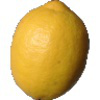

1/1 [==============================] - 0s 224ms/step
This image most likely belongs to Lemon with a 35.21 percent confidence.


In [ ]:
#TESTING & VISUALIZING ON INDIVIDUAL IMAGE:

!pip install Pillow
from PIL import Image

#CONFIGURATION 1 :-

#IMPORTING REQUIRED LIBRARIES:
import matplotlib.pyplot as plt                                        #For plotting graphs
import os                                                              #For operating system related functions
import zipfile
from google.colab import drive

#For Main Machine Learning framework:
import tensorflow as tf
from tensorflow import keras                                           #For builiding & training neural networks
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout, Lambda
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# IMPORTING DATASET:
drive.mount('/content/drive')                                             #To get folder from my google drive

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/fruits.zip', 'r')       #Opens the zip file in read mode
zip_ref.extractall('/content')                                            #Extracts the files into the /content folder
zip_ref.close()
fruits=[]

FruitsTypes=os.listdir('/content/fruits/fruits-360/Training')             #Getting subfolders i.e types of fruits names
print(FruitsTypes)


base_dir = '/content/fruits/fruits-360'                                   # relative path to the Fruit-Images-Dataset folder
test_dir = os.path.join(base_dir, 'Test')
train_dir = os.path.join(base_dir, 'Training')

#---------------------------------------------------------------------------------------------------------------------------


image_size    = (100, 100)          # width and height of the used images
input_shape   = (100, 100, 3)       # images in the Fruit-360 are 100 x 100 RGB images
batch_size    = 50
num_classes   = 6
validation_split = 0.25
learning_rate    = 0.1
verbose       = 1



#---------------------------------------------------------------------------------------------------------------------------


#splitting data in train_ds and val_ds
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.25,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    subset='training',
    seed=123,
) 

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.25,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False,
    subset='validation',
    seed=123,
)
class_names = train_ds.class_names
print(class_names)


AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(buffer_size=batch_size).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(buffer_size=batch_size).prefetch(buffer_size=AUTOTUNE)


#-------------------------------------------------------------------------------------------------

#Function to augment one image at a time, called inside data_augmentation
def augment_image(x):
    import tensorflow as tf
    x = tf.image.random_saturation(x, 0.9, 1.2)
    x = tf.image.random_hue(x, 0.02)
    return x



data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
  layers.RandomZoom(0.0),
  layers.RandomHeight(0.0),
  layers.RandomWidth(0.0),
  layers.Lambda(augment_image)

])


#---------------------------------------------------------------------------------------------------------------------------

def convert_to_hsv_and_grayscale(x):
    import tensorflow as tf
    hsv = tf.image.rgb_to_hsv(x)
    gray = tf.image.rgb_to_grayscale(x)
    rez = tf.concat([hsv, gray], axis=-1)
    return rez


model = Sequential([
    Input(shape = input_shape, name = 'data'),
    Lambda(convert_to_hsv_and_grayscale),
    Conv2D(16, (5, 5), strides=(1, 1), padding ='same', name = 'conv1'),
    Activation('relu', name = 'conv1_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool1'),
    Conv2D(32, (5, 5), strides = (1, 1), padding = 'same', name = 'conv2'),
    Activation('relu', name = 'conv2_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool2'),
    Conv2D(64, (5, 5), strides = (1, 1), padding = 'same', name = 'conv3'),
    Activation('relu', name = 'conv3_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool3'),
    Conv2D(128, (5, 5), strides = (1, 1), padding = 'same', name = 'conv4'),
    Activation('relu', name = 'conv4_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool4'),
    Flatten(),
    Dense(1024, activation='relu', name='fcl1'),
    Dropout(0.2),
    Dense(256, activation='relu', name='fcl2'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax', name='predictions')
])


optimizer = Adadelta(lr=learning_rate)
model.compile(optimizer = optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()


epochs = 25
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training accuracy')
plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.show()



#-------------------------------------------------------------------------------------------------
#                                     TESTING
#-------------------------------------------------------------------------------------------------


test_ds = tf.keras.utils.image_dataset_from_directory( 
    test_dir, 
    seed = 123, 
    image_size = image_size,
    shuffle=False                                 #No shuffling for classification report
)

test_images, test_labels = tuple(zip(*test_ds))

predictions = model.predict(test_ds)
score = tf.nn.softmax(predictions)

results = model.evaluate(test_ds)
print("Test loss, test acc:", results)

import numpy as np
#Testing indv images
print("Now testing individual Images: ")

testIm=Image.open("/content/FruitsImages/3_100.jpg")
testIm.show()

pathImage="/content/FruitsImages/3_100.jpg"
img = tf.keras.utils.load_img(
    pathImage, target_size=image_size
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)



In [ ]:
"""
FROM THIS COMPONENT ONWARDS DIFFERENT CONFIGUARTIONS WERE TRIED TO TEST ACCURACY OF OUR MODEL, 
IN ORDER TO DETERMINE WHICH CONFIGURATION GIVES MORE ACCURACY
SO FAR CONFIGUATION 6 WAS MOST ACCURATE (100% Training & 99.72% Testing Accuracy)

DETAILS OF CONFIGURATION 6 ARE AS FOLLOWS:
 Convolutional 16 5x5
 Convolutional 32 5x5
 Convolutional 32 5x5
 Convolutional 128 5x5
 Fully Connected 1024
 Fully Connected 256
"""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Cantaloupe 1', 'Banana', 'Tomato 1', 'Lemon', 'Apple Braeburn', 'Apricot']
Found 3196 files belonging to 6 classes.
Using 2397 files for training.
Found 3196 files belonging to 6 classes.
Using 799 files for validation.
['Apple Braeburn', 'Apricot', 'Banana', 'Cantaloupe 1', 'Lemon', 'Tomato 1']


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_11 (Lambda)          (None, 100, 100, 4)       0         
                                                                 
 conv1 (Conv2D)              (None, 100, 100, 16)      1616      
                                                                 
 conv1_relu (Activation)     (None, 100, 100, 16)      0         
                                                                 
 pool1 (MaxPooling2D)        (None, 50, 50, 16)        0         
                                                                 
 conv2 (Conv2D)              (None, 50, 50, 32)        12832     
                                                                 
 conv2_relu (Activation)     (None, 50, 50, 32)        0         
                                                                 
 pool2 (MaxPooling2D)        (None, 25, 25, 32)      

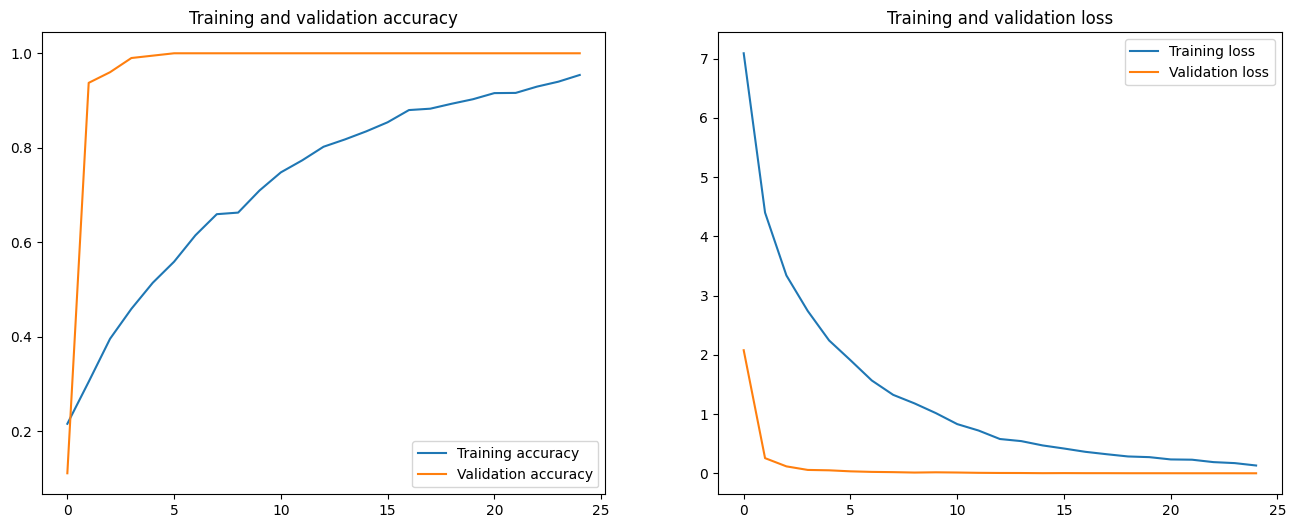

Found 1068 files belonging to 6 classes.
34/34 [==============================] - 9s 262ms/step - loss: 0.0237 - accuracy: 0.9972
Test loss, test acc: [0.023716578260064125, 0.9971910119056702]


In [ ]:
#                                                             CONFIGURATION 6



import matplotlib.pyplot as plt
import os
import zipfile
from google.colab import drive

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout, Lambda
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator




# IMPORTING DATASET
drive.mount('/content/drive')                                             #To get folder from my google drive

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/fruits.zip', 'r')       #Opens the zip file in read mode
zip_ref.extractall('/content')                                            #Extracts the files into the /content folder
zip_ref.close()
fruits=[]

FruitsTypes=os.listdir('/content/fruits/fruits-360/Training')             #Getting subfolders i.e types of fruits names
print(FruitsTypes)


base_dir = '/content/fruits/fruits-360'                                   # relative path to the Fruit-Images-Dataset folder
test_dir = os.path.join(base_dir, 'Test')
train_dir = os.path.join(base_dir, 'Training')


#---------------------------------------------------------------------------------------------------------------------------


image_size    = (100, 100)                    # width and height of the images
input_shape   = (100, 100, 3)                 # images in the Fruit-360 are 100 x 100 RGB images
batch_size    = 50
num_classes   = 6
validation_split = 0.25
learning_rate    = 0.1
verbose       = 1

#---------------------------------------------------------------------------------------------------------------------------

#splitting data in train_ds and val_ds
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.25,
    image_size=image_size,
    #class_mode='sparse',
    batch_size=batch_size,
    shuffle=True,
    subset='training',
    seed=123,
    #classes=labels
) 

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.25,
    image_size=image_size,
    #class_mode='sparse',
    batch_size=batch_size,
    shuffle=False,
    subset='validation',
    seed=123,
    #classes=labels
)
class_names = train_ds.class_names
print(class_names)


AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(buffer_size=batch_size).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(buffer_size=batch_size).prefetch(buffer_size=AUTOTUNE)


#-------------------------------------------------------------------------------------------------

#Function to augment one image at a time, called inside data_augmentation
def augment_image(x):
    import tensorflow as tf
    x = tf.image.random_saturation(x, 0.9, 1.2)
    x = tf.image.random_hue(x, 0.02)
    return x



data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
  layers.RandomZoom(0.0),
  layers.RandomHeight(0.0),
  layers.RandomWidth(0.0),
  layers.Lambda(augment_image)

])


#---------------------------------------------------------------------------------------------------------------------------


def convert_to_hsv_and_grayscale(x):
    import tensorflow as tf
    hsv = tf.image.rgb_to_hsv(x)
    gray = tf.image.rgb_to_grayscale(x)
    rez = tf.concat([hsv, gray], axis=-1)
    return rez



model = Sequential([
    Input(shape = input_shape, name = 'data'),
    Lambda(convert_to_hsv_and_grayscale),
    Conv2D(16, (5, 5), strides=(1, 1), padding ='same', name = 'conv1'),
    Activation('relu', name = 'conv1_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool1'),
    Conv2D(32, (5, 5), strides = (1, 1), padding = 'same', name = 'conv2'),
    Activation('relu', name = 'conv2_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool2'),
    Conv2D(32, (5, 5), strides = (1, 1), padding = 'same', name = 'conv3'),
    Activation('relu', name = 'conv3_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool3'),
    Conv2D(128, (5, 5), strides = (1, 1), padding = 'same', name = 'conv4'),
    Activation('relu', name = 'conv4_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool4'),
    Flatten(),
    Dense(1024, activation='relu', name='fcl1'),
    Dropout(0.2),
    Dense(256, activation='relu', name='fcl2'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax', name='predictions')
])


optimizer = Adadelta(lr=learning_rate)
model.compile(optimizer = optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()


epochs = 25
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training accuracy')
plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.show()



#-------------------------------------------------------------------------------------------------
#                                     TESTING
#-------------------------------------------------------------------------------------------------


test_ds = tf.keras.utils.image_dataset_from_directory( 
    test_dir, 
    seed = 123, 
    image_size = image_size,
    shuffle=False #No shuffling for classification report
)

test_images, test_labels = tuple(zip(*test_ds))

predictions = model.predict(test_ds)
score = tf.nn.softmax(predictions)

results = model.evaluate(test_ds)
print("Test loss, test acc:", results)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Tomato 1', 'Lemon', 'Banana', 'Cantaloupe 1', 'Apricot', 'Apple Braeburn']
Found 3196 files belonging to 6 classes.
Using 2397 files for training.
Found 3196 files belonging to 6 classes.
Using 799 files for validation.
['Apple Braeburn', 'Apricot', 'Banana', 'Cantaloupe 1', 'Lemon', 'Tomato 1']


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_5 (Lambda)           (None, 100, 100, 4)       0         
                                                                 
 conv1 (Conv2D)              (None, 100, 100, 8)       808       
                                                                 
 conv1_relu (Activation)     (None, 100, 100, 8)       0         
                                                                 
 pool1 (MaxPooling2D)        (None, 50, 50, 8)         0         
                                                                 
 conv2 (Conv2D)              (None, 50, 50, 32)        6432      
                                                                 
 conv2_relu (Activation)     (None, 50, 50, 32)        0         
                                                                 
 pool2 (MaxPooling2D)        (None, 25, 25, 32)       

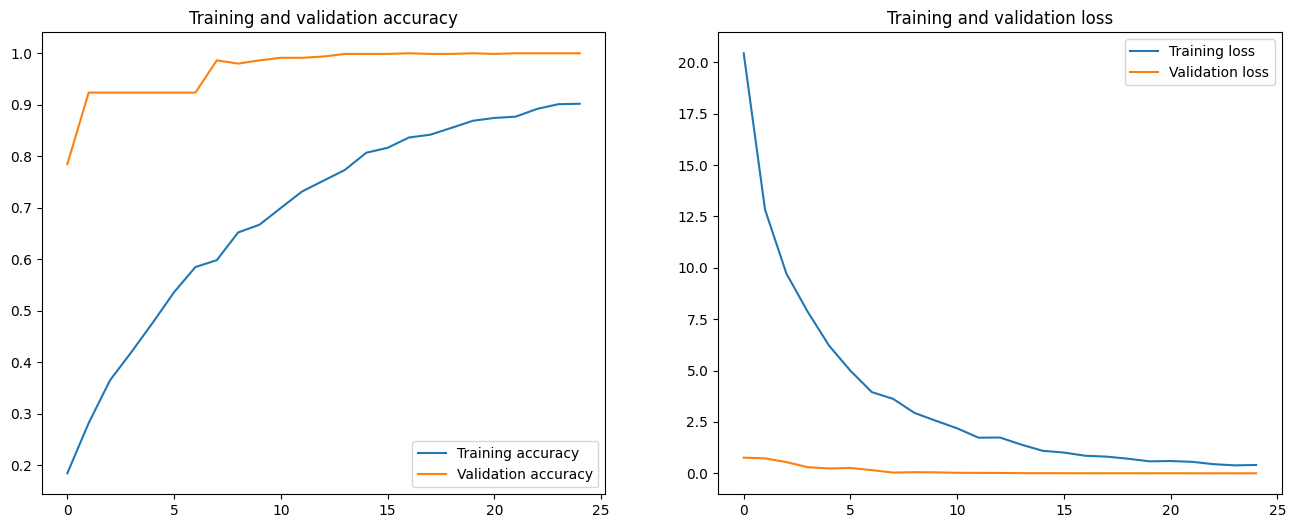

Found 1068 files belonging to 6 classes.
34/34 [==============================] - 7s 215ms/step - loss: 0.0858 - accuracy: 0.9522
Test loss, test acc: [0.0857841894030571, 0.9522472023963928]


In [ ]:
                                                              #CONFIGURATION 2

import matplotlib.pyplot as plt
import os
import zipfile
from google.colab import drive

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout, Lambda
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator




# IMPORTING DATASET
drive.mount('/content/drive')                                               #To get folder from my google drive

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/fruits.zip', 'r')         #Opens the zip file in read mode
zip_ref.extractall('/content')                                              #Extract the files into the /content folder
zip_ref.close()
fruits=[]

FruitsTypes=os.listdir('/content/fruits/fruits-360/Training')               #Getting subfolders i.e types of fruits names
print(FruitsTypes)


base_dir = '/content/fruits/fruits-360'                                     # relative path to the Fruit-Images-Dataset folder
test_dir = os.path.join(base_dir, 'Test')
train_dir = os.path.join(base_dir, 'Training')



image_size    = (100, 100)          # width and height of the used images
input_shape   = (100, 100, 3)       # images in the Fruit-360 are 100 x 100 RGB images
batch_size    = 50
num_classes   = 6
validation_split = 0.25
learning_rate    = 0.1
verbose       = 1



#---------------------------------------------------------------------------------------------------------------------------


#splitting data in train_ds and val_ds
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.25,
    image_size=image_size,
    #class_mode='sparse',
    batch_size=batch_size,
    shuffle=True,
    subset='training',
    seed=123,
    #classes=labels
) 

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.25,
    image_size=image_size,
    #class_mode='sparse',
    batch_size=batch_size,
    shuffle=False,
    subset='validation',
    seed=123,
    #classes=labels
)
class_names = train_ds.class_names
print(class_names)



AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(buffer_size=batch_size).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(buffer_size=batch_size).prefetch(buffer_size=AUTOTUNE)


#-------------------------------------------------------------------------------------------------

#Function to augment one image at a time, called inside data_augmentation
def augment_image(x):
    import tensorflow as tf
    x = tf.image.random_saturation(x, 0.9, 1.2)
    x = tf.image.random_hue(x, 0.02)
    return x



data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
  layers.RandomZoom(0.0),
  layers.RandomHeight(0.0),
  layers.RandomWidth(0.0),
  layers.Lambda(augment_image)

])


#-------------------------------------------------------------------------------------------------------------

def convert_to_hsv_and_grayscale(x):
    import tensorflow as tf
    hsv = tf.image.rgb_to_hsv(x)
    gray = tf.image.rgb_to_grayscale(x)
    rez = tf.concat([hsv, gray], axis=-1)
    return rez


model = Sequential([
    Input(shape = input_shape, name = 'data'),
    Lambda(convert_to_hsv_and_grayscale),
    Conv2D(8, (5, 5), strides=(1, 1), padding ='same', name = 'conv1'),
    Activation('relu', name = 'conv1_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool1'),
    Conv2D(32, (5, 5), strides = (1, 1), padding = 'same', name = 'conv2'),
    Activation('relu', name = 'conv2_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool2'),
    Conv2D(64, (5, 5), strides = (1, 1), padding = 'same', name = 'conv3'),
    Activation('relu', name = 'conv3_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool3'),
    Conv2D(128, (5, 5), strides = (1, 1), padding = 'same', name = 'conv4'),
    Activation('relu', name = 'conv4_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool4'),
    Flatten(),
    Dense(1024, activation='relu', name='fcl1'),
    Dropout(0.2),
    Dense(256, activation='relu', name='fcl2'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax', name='predictions')
])

optimizer = Adadelta(lr=learning_rate)
model.compile(optimizer = optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

epochs = 25
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training accuracy')
plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.show()



#-------------------------------------------------------------------------------------------------
#                                     TESTING
#-------------------------------------------------------------------------------------------------


test_ds = tf.keras.utils.image_dataset_from_directory( 
    test_dir, 
    seed = 123, 
    image_size = image_size,
    shuffle=False #No shuffling for classification report
)

test_images, test_labels = tuple(zip(*test_ds))

predictions = model.predict(test_ds)
score = tf.nn.softmax(predictions)

results = model.evaluate(test_ds)
print("Test loss, test acc:", results)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Tomato 1', 'Lemon', 'Banana', 'Cantaloupe 1', 'Apricot', 'Apple Braeburn']
Found 3196 files belonging to 6 classes.
Using 2397 files for training.
Found 3196 files belonging to 6 classes.
Using 799 files for validation.
['Apple Braeburn', 'Apricot', 'Banana', 'Cantaloupe 1', 'Lemon', 'Tomato 1']


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_7 (Lambda)           (None, 100, 100, 4)       0         
                                                                 
 conv1 (Conv2D)              (None, 100, 100, 16)      1616      
                                                                 
 conv1_relu (Activation)     (None, 100, 100, 16)      0         
                                                                 
 pool1 (MaxPooling2D)        (None, 50, 50, 16)        0         
                                                                 
 conv2 (Conv2D)              (None, 50, 50, 32)        12832     
                                                                 
 conv2_relu (Activation)     (None, 50, 50, 32)        0         
                                                                 
 pool2 (MaxPooling2D)        (None, 25, 25, 32)       

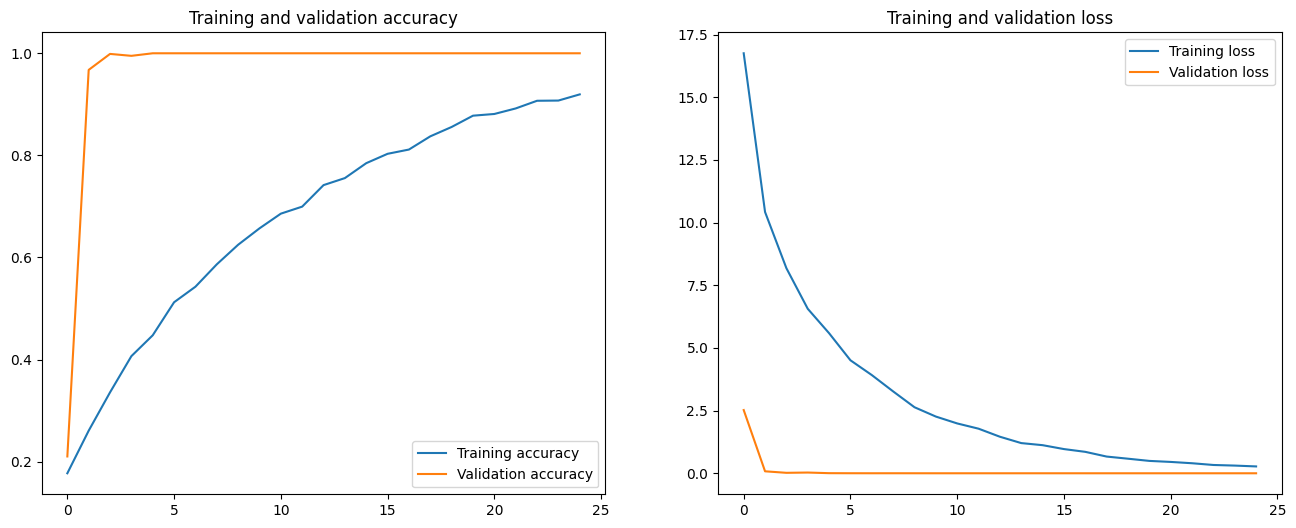

Found 1068 files belonging to 6 classes.
34/34 [==============================] - 10s 293ms/step - loss: 0.0240 - accuracy: 0.9944
Test loss, test acc: [0.02399110049009323, 0.9943820238113403]


In [ ]:
                                                                  #CONFIGURATION 10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
import os
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout, Lambda

from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint




# IMPORTING DATASET
import os
import zipfile
from google.colab import drive
drive.mount('/content/drive') #To get folder from my google drive

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/fruits.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /content folder
zip_ref.close()
fruits=[]

FruitsTypes=os.listdir('/content/fruits/fruits-360/Training') #Getting subfolders i.e types of fruits names
print(FruitsTypes)


base_dir = '/content/fruits/fruits-360'  # relative path to the Fruit-Images-Dataset folder
test_dir = os.path.join(base_dir, 'Test')
train_dir = os.path.join(base_dir, 'Training')


#---------------------------------------------------------------------------------------------------------------------------


image_size    = (100, 100)          # width and height of the used images
input_shape   = (100, 100, 3)       # images in the Fruit-360 are 100 x 100 RGB images
batch_size    = 50
num_classes   = 6
validation_split = 0.25
learning_rate    = 0.1
verbose       = 1



#---------------------------------------------------------------------------------------------------------------------------


#splitting data in train_ds and val_ds
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.25,
    image_size=image_size,
    #class_mode='sparse',
    batch_size=batch_size,
    shuffle=True,
    subset='training',
    seed=123,
    #classes=labels
) 

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.25,
    image_size=image_size,
    #class_mode='sparse',
    batch_size=batch_size,
    shuffle=False,
    subset='validation',
    seed=123,
    #classes=labels
)
class_names = train_ds.class_names
print(class_names)



AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(buffer_size=batch_size).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(buffer_size=batch_size).prefetch(buffer_size=AUTOTUNE)


#-------------------------------------------------------------------------------------------------

#Function to augment one image at a time, called inside data_augmentation
def augment_image(x):
    import tensorflow as tf
    x = tf.image.random_saturation(x, 0.9, 1.2)
    x = tf.image.random_hue(x, 0.02)
    return x



data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
  layers.RandomZoom(0.0),
  layers.RandomHeight(0.0),
  layers.RandomWidth(0.0),
  layers.Lambda(augment_image)

])



#---------------------------------------------------------------------------------------------------------------------------

def convert_to_hsv_and_grayscale(x):
    import tensorflow as tf
    hsv = tf.image.rgb_to_hsv(x)
    gray = tf.image.rgb_to_grayscale(x)
    rez = tf.concat([hsv, gray], axis=-1)
    return rez


model = Sequential([
    Input(shape = input_shape, name = 'data'),
    Lambda(convert_to_hsv_and_grayscale),
    Conv2D(16, (5, 5), strides=(1, 1), padding ='same', name = 'conv1'),
    Activation('relu', name = 'conv1_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool1'),
    Conv2D(32, (5, 5), strides = (1, 1), padding = 'same', name = 'conv2'),
    Activation('relu', name = 'conv2_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool2'),
    Conv2D(64, (5, 5), strides = (1, 1), padding = 'same', name = 'conv3'),
    Activation('relu', name = 'conv3_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool3'),
    Conv2D(128, (5, 5), strides = (1, 1), padding = 'same', name = 'conv4'),
    Activation('relu', name = 'conv4_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool4'),
    Flatten(),
    Dense(1024, activation='relu', name='fcl1'),
    Dropout(0.2),
    Dense(512, activation='relu', name='fcl2'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax', name='predictions')
])

optimizer = Adadelta(lr=learning_rate)
model.compile(optimizer = optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

epochs = 25
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training accuracy')
plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.show()



#-------------------------------------------------------------------------------------------------
#                                     TESTING
#-------------------------------------------------------------------------------------------------


test_ds = tf.keras.utils.image_dataset_from_directory( 
    test_dir, 
    seed = 123, 
    image_size = image_size,
    shuffle=False #No shuffling for classification report
)

test_images, test_labels = tuple(zip(*test_ds))

predictions = model.predict(test_ds)
score = tf.nn.softmax(predictions)

results = model.evaluate(test_ds)
print("Test loss, test acc:", results)

Mounted at /content/drive
['Banana', 'Cantaloupe 1', 'Apple Braeburn', 'Tomato 1', 'Apricot', 'Lemon']
Found 3196 files belonging to 6 classes.
Using 2397 files for training.
Found 3196 files belonging to 6 classes.
Using 799 files for validation.
['Apple Braeburn', 'Apricot', 'Banana', 'Cantaloupe 1', 'Lemon', 'Tomato 1']


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 100, 100, 4)       0         
                                                                 
 conv1 (Conv2D)              (None, 100, 100, 32)      3232      
                                                                 
 conv1_relu (Activation)     (None, 100, 100, 32)      0         
                                                                 
 pool1 (MaxPooling2D)        (None, 50, 50, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 50, 50, 32)        25632     
                                                                 
 conv2_relu (Activation)     (None, 50, 50, 32)        0         
                                                                 
 pool2 (MaxPooling2D)        (None, 25, 25, 32)       

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


48/48 [==============================] - 105s 2s/step - loss: 17.9376 - accuracy: 0.2653 - val_loss: 0.0679 - val_accuracy: 0.9712
Epoch 2/25
48/48 [==============================] - 95s 2s/step - loss: 9.8645 - accuracy: 0.3517 - val_loss: 0.1760 - val_accuracy: 0.9337
Epoch 3/25
48/48 [==============================] - 102s 2s/step - loss: 7.8380 - accuracy: 0.3984 - val_loss: 0.1117 - val_accuracy: 0.9424
Epoch 4/25
48/48 [==============================] - 103s 2s/step - loss: 6.1875 - accuracy: 0.4510 - val_loss: 0.1123 - val_accuracy: 0.9399
Epoch 5/25
48/48 [==============================] - 99s 2s/step - loss: 5.1498 - accuracy: 0.4965 - val_loss: 0.0675 - val_accuracy: 0.9625
Epoch 6/25
48/48 [==============================] - 97s 2s/step - loss: 4.1228 - accuracy: 0.5590 - val_loss: 0.0461 - val_accuracy: 0.9775
Epoch 7/25
48/48 [==============================] - 99s 2s/step - loss: 3.3508 - accuracy: 0.5978 - val_loss: 0.0393 - val_accuracy: 0.9800
Epoch 8/25
48/48 [=========

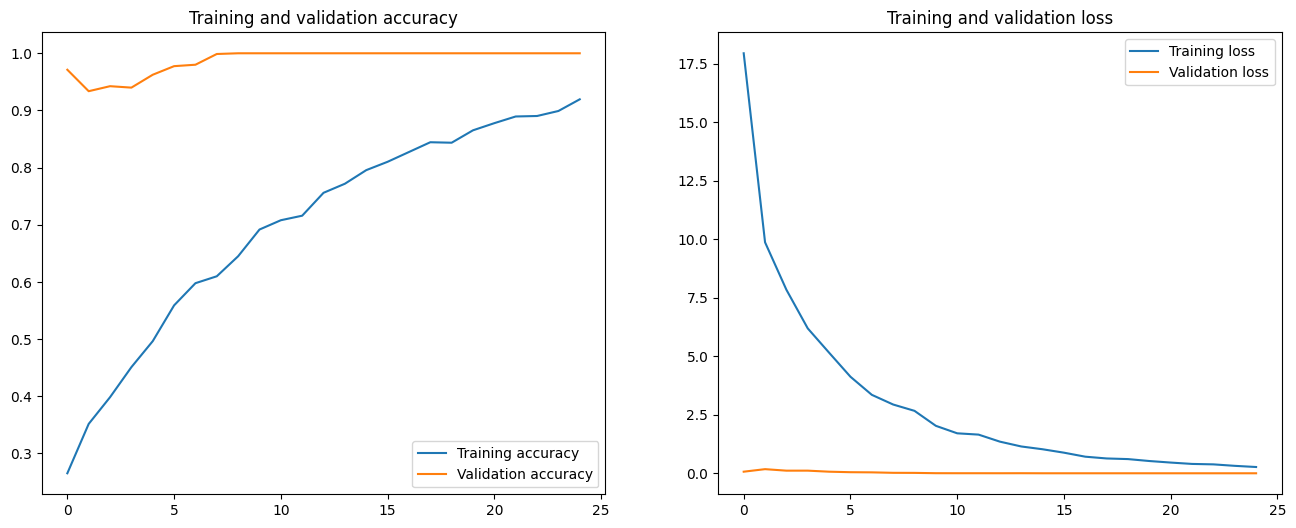

Found 1068 files belonging to 6 classes.
34/34 [==============================] - 11s 315ms/step - loss: 0.0179 - accuracy: 0.9953
Test loss, test acc: [0.01787169650197029, 0.9953183531761169]


In [ ]:
#CONFIGURATION 3 :-

#IMPORTING REQUIRED LIBRARIES:
import matplotlib.pyplot as plt                                        #For plotting graphs
import os                                                              #For operating system related functions
import zipfile
from google.colab import drive

#For Main Machine Learning framework:
import tensorflow as tf
from tensorflow import keras                                           #For builiding & training neural networks
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout, Lambda
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint


# IMPORTING DATASET:
drive.mount('/content/drive')                                             #To get folder from my google drive

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/fruits.zip', 'r')       #Opens the zip file in read mode
zip_ref.extractall('/content')                                            #Extracts the files into the /content folder
zip_ref.close()
fruits=[]

FruitsTypes=os.listdir('/content/fruits/fruits-360/Training')             #Getting subfolders i.e types of fruits names
print(FruitsTypes)


base_dir = '/content/fruits/fruits-360'                                   # relative path to the Fruit-Images-Dataset folder
test_dir = os.path.join(base_dir, 'Test')
train_dir = os.path.join(base_dir, 'Training')

#---------------------------------------------------------------------------------------------------------------------------


image_size    = (100, 100)          # width and height of the used images
input_shape   = (100, 100, 3)       # images in the Fruit-360 are 100 x 100 RGB images
batch_size    = 50
num_classes   = 6
validation_split = 0.25
learning_rate    = 0.1
verbose       = 1



#---------------------------------------------------------------------------------------------------------------------------


#splitting data in train_ds and val_ds
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.25,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    subset='training',
    seed=123,
) 

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.25,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False,
    subset='validation',
    seed=123,
)
class_names = train_ds.class_names
print(class_names)


AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(buffer_size=batch_size).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(buffer_size=batch_size).prefetch(buffer_size=AUTOTUNE)


#-------------------------------------------------------------------------------------------------

#Function to augment one image at a time, called inside data_augmentation
def augment_image(x):
    import tensorflow as tf
    x = tf.image.random_saturation(x, 0.9, 1.2)
    x = tf.image.random_hue(x, 0.02)
    return x



data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
  layers.RandomZoom(0.0),
  layers.RandomHeight(0.0),
  layers.RandomWidth(0.0),
  layers.Lambda(augment_image)

])


#---------------------------------------------------------------------------------------------------------------------------

def convert_to_hsv_and_grayscale(x):
    import tensorflow as tf
    hsv = tf.image.rgb_to_hsv(x)
    gray = tf.image.rgb_to_grayscale(x)
    rez = tf.concat([hsv, gray], axis=-1)
    return rez


model = Sequential([
    Input(shape = input_shape, name = 'data'),
    Lambda(convert_to_hsv_and_grayscale),
    Conv2D(32, (5, 5), strides=(1, 1), padding ='same', name = 'conv1'),
    Activation('relu', name = 'conv1_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool1'),
    Conv2D(32, (5, 5), strides = (1, 1), padding = 'same', name = 'conv2'),
    Activation('relu', name = 'conv2_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool2'),
    Conv2D(64, (5, 5), strides = (1, 1), padding = 'same', name = 'conv3'),
    Activation('relu', name = 'conv3_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool3'),
    Conv2D(128, (5, 5), strides = (1, 1), padding = 'same', name = 'conv4'),
    Activation('relu', name = 'conv4_relu'),
    MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid', name = 'pool4'),
    Flatten(),
    Dense(1024, activation='relu', name='fcl1'),
    Dropout(0.2),
    Dense(256, activation='relu', name='fcl2'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax', name='predictions')
])


optimizer = Adadelta(lr=learning_rate)
model.compile(optimizer = optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()


epochs = 25
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training accuracy')
plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.show()



#-------------------------------------------------------------------------------------------------
#                                     TESTING
#-------------------------------------------------------------------------------------------------


test_ds = tf.keras.utils.image_dataset_from_directory( 
    test_dir, 
    seed = 123, 
    image_size = image_size,
    shuffle=False                                 #No shuffling for classification report
)

test_images, test_labels = tuple(zip(*test_ds))

predictions = model.predict(test_ds)
score = tf.nn.softmax(predictions)

results = model.evaluate(test_ds)
print("Test loss, test acc:", results)